# PRC - Temel Bileşen Regresyonu

# Model

In [1]:
import pandas as pd
import numpy as np
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [2]:
df.info() #dropna ile nan indexleri uçurdruğumuzdan 1'den 321'e kadar insexler gidiyor

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [4]:
# kategorik değişkenleri regresyona alamayacağımız için onehot encoding dönüşümü yaptık
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [5]:
y = df["Salary"]

In [6]:
# X yani bağımsız değişkenlerde onehotencoding sonucu oluşan dummy değişkenlerden kurtulmak için:

In [7]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

In [8]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [9]:
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [10]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [12]:
# Sklearn PCR'ın uygulamasını barındırmadığından bunu kendimiz uygulamamız gerekiyor
# Bu yüzden önce kendimiz bir PCA işlemi gerçekleştirip bulduğumuz PCA üzerine fromscratch tarzda PCR uygulaması gerçekleştir  

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA() # normalde bileşen sayısı argümanı var AMA değişken sayısı kadar bileşen oluşma işlemi olması için girmiyoruz

In [14]:
# Önce verinin ölçeklendirilmesi ve bileşenlerin oluşturulması işlemini yapıcaz

In [15]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [16]:
# yukarda sadece fit (model nesnesi oluşur) yerine fit_transform scale kullanma sebebi hem model oluşup hem indirgeme olsun

In [17]:
# Değişken sayısı kadar bileşen oluşturulmuş ama bağlantı problem ortadan kalkmış ve indirgenmiş veriseti oluştu

In [18]:
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [19]:
# Oluşan indirgenmiş bileşenlerce kümülatif olarak açıklanan varyansı görmek istersek:

In [20]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([38.18, 59.88, 70.88, 78.88, 84.18])

In [21]:
# Yani ilk 5 bileşeni aldığımızda verinin %84'ünü açıklayabiliriz demek oluyor, 1. bileşen değişkenliğin %38'ini açıklamış 

In [22]:
# Son kısımda da modele veriyi eklemek kalıyor

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()

In [25]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [26]:
pcr_model.intercept_

543.4834416243655

In [27]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

# Tahmin

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
y_pred = pcr_model.predict(X_reduced_train)

In [30]:
y_pred[0:5] # algoritmamızın yaptığı tahminler

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [31]:
np.sqrt(mean_squared_error(y_train, y_pred)) # rmse hatasının hesabı

289.32928255649756

In [32]:
df["Salary"].mean() # burada görüyoruz ki tahminlerimiz çok da iyi değil denebilir

535.9258821292775

In [33]:
r2_score(y_train, y_pred) # r2 değerimiz

0.577007525041018

In [34]:
# test hatası değerleri

In [35]:
pca2 = PCA()

In [36]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [37]:
y_pred = pcr_model.predict(X_reduced_test) # indirgenmiş test veri seti üzerinden y_predleri hesaplayacağız

In [38]:
np.sqrt(mean_squared_error(y_test, y_pred)) # test setinin test hatası (rmse)

405.1575364149966

# Model Tuning

In [39]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)
y_pred = pcr_model.predict(X_reduced_test) 
print(np.sqrt(mean_squared_error(y_test, y_pred))) # burada bütün bileşenler ile kurulan modelin test hatasına bakıyoruz

405.1575364149966


In [40]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:1], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:1])
print(np.sqrt(mean_squared_error(y_test, y_pred))) # burada ilk bileşen ile kurulan modelin test hatasına bakıyoruz

392.3893558949347


In [41]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred))) # burada ilk 10 bileşen ile kurulan modelin test hatasına bakıyoruz

390.7914255682223


#### Şimdi yapacağımız şey, burada hata değerlerini tek tek deneyip en optimum algoritma bileşen sayısını bulmak yerine *cross validation* yaparak olası bileşen değerlerini bir vektör olarak gönderip optimum bileşen sayımızı bulmak: 

### Yani hiperparametre optimizasyonu yapıyoruz

In [42]:
from sklearn import model_selection

In [43]:
# 10 katlı bir cv yapılandırması yapıyoruz
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True, # gruplara ayrılmadan önce verilerin karıştırılıp karıştırılmayacağı komutu
                             random_state = 1)

In [44]:
### Brute Force Yöntemi ile değerlendirme yapacağız

In [45]:
lm = LinearRegression()

In [46]:
RMSE = []

#### sklearn'ün içinde native PCR desteği olmadığından kendimiz hiperparametre optimizasyonu işlemini brute force yöntemi ile bir döngü yazarak RMSE'leri her bir olası bileşende değerlendirip bu işlemi kendimiz yapıyoruz.

Ama genelde native destek olacağından bu kısıma çok takılmayalım

In [47]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

In [48]:
import matplotlib.pyplot as plt

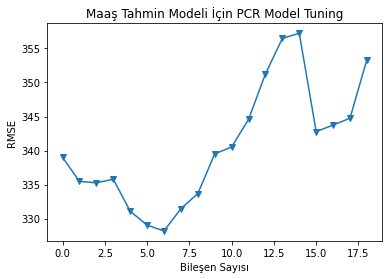

In [49]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

Optimum bileşen sayısının kaç olması gerektiğini cv yöntemiyle (doğrulama ve bleşen sayısı seçme) ve train setini kullanarak bileşen sayısını belirledik. (6)


#### Şuan model hiperparametresini bulduğumuz optimum bileşen sayısıyla (6) final modelini oluşturmalıyız. 

In [50]:
lm = LinearRegression()

In [51]:
pcr_model = lm.fit(X_reduced_train[:, 0:6], y_train) #PCR modelimiz kuruldu

In [52]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6]) # oluşturduğumuz son model üzerinden tahmin değerlerini oluşturuyoruz

In [53]:
print(np.sqrt(mean_squared_error(y_train, y_pred))) # eğitim setimiz için oluşan son modelle hata miktarına baktık

308.82659830945005


#### Şimdi en önemli ve son olarak test seti üzerindeki hata değerine bakacağız

In [55]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [56]:
print(np.sqrt(mean_squared_error(y_test, y_pred))) 

393.1198700096223


Genelde beklentimiz modelin tune edilmeden önceki ortaya koyduğu test hatasıyla tune edildikten sonraki test hatası karşılaştırıldığında tune edilmiş modelin test hatasının daha aşağıda olması beklenir. 

Fakat elimizdeki test ve train değerlendirme işlemlerinde valide edilmiş skorlar üzerinden bu işlemi yapıyorsak bu beklenti daha sağlıklı olacaktır. 

Bu modelde ilk test ve train hata değerlerini bulurken cv yapmamıştık ondan aksi bir durum oluşmuş olabilir.

# ------------------------------------------------------------------------

1. Öncelikle her zaman ilkel bir şekilde test ve train hata değerleri hesaplanır (tahmin başlığı altında)

2. Bu elde ettiğimiz train ve test hatasını daha doğru değerlendirebilmenin yolu cv yöntemi ile bunları incelemek demiştik.

3. Elde ettiğimiz ilk train ve test hatasını cv yöntemiyle birdaha göz önünde bulundurduğumuzda elimize daha doğru hata değerleri gelecektir

Model Tuning bölümüne geldiğimizde ise Tune ettiğimiz model demek model için uygun *HİPERPARAMETRE* değerini bulduğumuz anlamına gelir. 

Bunun için cv yöntemini kullanırız yani cv yöntemini o modelin en iyi parametre değerini bulmak için kullanmak oluyor.

Bunları yaptıktan sonra train setiyle bir işimiz kalmıyor çünkü onu uygun parametreleri bulmak için onu kullandık. 

#### Final Modeli: 

Bulmuş olduğumuz final parametre değeri ile final modelini kurmuş oluyoruz. Bu modeli kurduktan sonra yine önümüzde train ve test hatası değerlendirme işlemimiz olacak çünkü yeni bir model kurmuş oluyoruz.

En optimum parametreyi modele göstererek train seti üstünden modeli kuruyoruz.

Model kurulduktans sonraki train hatası ile ilgilenmiyoruz çünkü artık optimum olduğuna kanaat getirdiğimiz parametreleri yerleştirdik.

Son aşamada test setini değerlendirirken yeniden cv yöntemiyle değerlendirebiliriz veya (sınama seti olarak dışarda bıraktığımız set olduğundan) bunun için cv uygulamadan da test hatasına gidebiliriz.

# Yani ilerleyiş şeklimiz :

1. Model Tuning ile model parametre değerlerini bulucaz

2. Bu parametre değerleri ile final modellerini oluşturucaz

3. Final modelleri üzerinden de son test hatalarını hesaplayacağız. Bunu sınama seti yaklaşımıyla hesaplayacağız ki bütün modellerle bu şekilde değerlendirme imkanı bulalım.

4. Bu şekilde elde ettiğimiz değer ise Tune edilmiş modelin hata değeri olacak. Yani final test hatamızı bulmuş olacağız.